# Homework #3 (option #1)

## Haesook Ma

**Homework3 -- construct a visualization of the Illinois Building Inventory that communicates the following information -- choose 3 out of the 4 listed below to visualize:**

- Relationship between the year acquired and the year constructed
- Total square footage as a function of congressional district ("Congress Dist")
- Average square footage per floor as a function of congressional district
- Square footage for the five most common departments (aka "Agency Name") as a function of year. 

(Each component will be worth 10 points (5 for code and 5 for writeup of your narrative disucssing your process what things did/did not work) and must be a completely communicative visualization -- including labels and a one paragraph writeup of successes and shortcomings in your approach.)

### 1. Relationship between the year acquired and the year constructed

In [1]:
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

# import the pandas package
import pandas as pd

In [2]:
buildings = pd.read_csv("building_inventory.csv")

In [3]:
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,330,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,1987,130,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971,1971,49552,1,1,0,Education,Education,Not provided


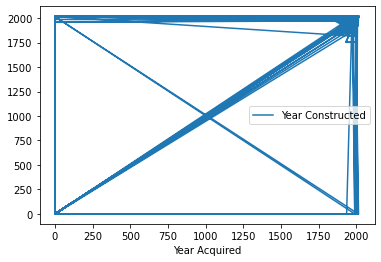

In [4]:
# make a plot (x = Year Acquired, y = Year Constructed)
buildings.plot(x = "Year Acquired", y = "Year Constructed")
plt.show()

The above plot cannot show the relationship between Year Acquired and Year Constructed. I will change it to *Scatter* plot:

<AxesSubplot:xlabel='Year Acquired', ylabel='Year Constructed'>

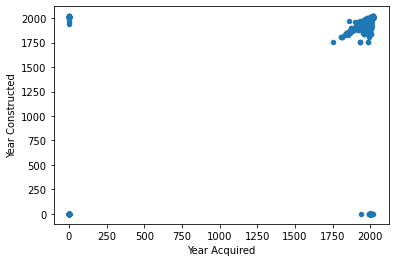

In [5]:
buildings.plot(x = "Year Acquired", y = "Year Constructed", kind = 'scatter')

There are several data having '0' value. I will eliminate these 'bad data':

In [6]:
b = pd.read_csv("building_inventory.csv",
               na_values = {'Year Acquired': 0,
                           'Year Constructed': 0})

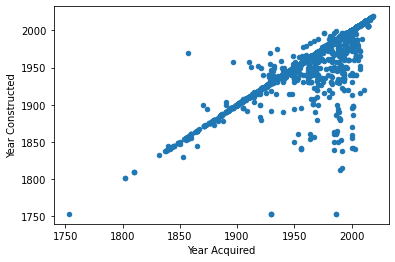

In [7]:
b.plot(x = "Year Acquired", y = "Year Constructed", kind = 'scatter')
plt.show()

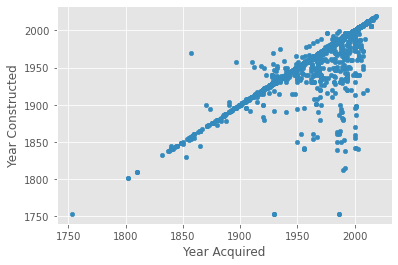

In [8]:
with plt.style.context("ggplot") :
    b.plot(x = "Year Acquired", y = "Year Constructed", kind = 'scatter')
    plt.show()

#### To conclude

There were several *bad data* containing '0' values. When drawing a plot including bad data, it was not possible to see any trend among data. However, when I eliminate bad data, I could clearly see the relationship between "Year Acquired" and "Year Constructed". Also, in this data set, the scatter plot was appropriate.

### 2. Total square footage as a function of congressional district ("Congress Dist")

In order to see the total square footage by Congress Dist, I will use 'groupby' function to make sum of square footage.

In [9]:
agg_data = buildings.groupby("Congress Dist")["Square Footage"].sum()

In [10]:
agg_data

Congress Dist
0       793124
1      2351762
2      6285684
3      1293687
4       317741
5      1809022
6       145659
7      9211651
8      1461548
9        77978
10      929267
11     3467894
12    12444775
13    31849251
14      857108
15     7209934
16     8725880
17     4347743
18     8120838
Name: Square Footage, dtype: int64

In [11]:
agg_data.index # Congress Dist

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64', name='Congress Dist')

In [12]:
agg_data.values # the total square footage

array([  793124,  2351762,  6285684,  1293687,   317741,  1809022,
         145659,  9211651,  1461548,    77978,   929267,  3467894,
       12444775, 31849251,   857108,  7209934,  8725880,  4347743,
        8120838], dtype=int64)

In [13]:
agg_data.values.max()

31849251

In [14]:
agg_data.values[13]

31849251

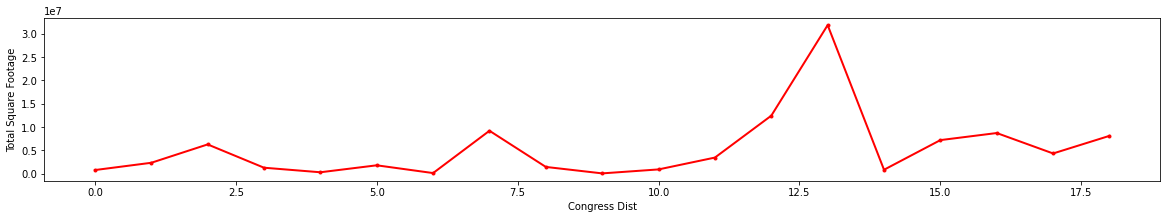

In [15]:
fig, ax = plt.subplots(figsize = (20,3))
ax.plot(agg_data.values, '.-r', linewidth = 2)
ax.set_xlabel("Congress Dist")
ax.set_ylabel("Total Square Footage")
plt.show()

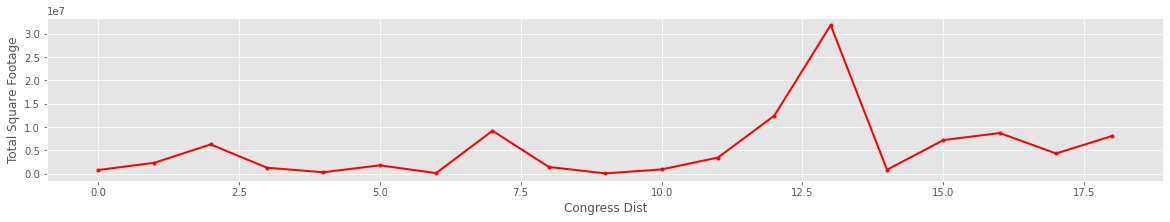

In [16]:
with plt.style.context("ggplot") :
    fig, ax = plt.subplots(figsize = (20,3))
    ax.plot(agg_data.values, '.-r', linewidth = 2)
    ax.set_xlabel("Congress Dist")
    ax.set_ylabel("Total Square Footage")
    plt.show()

#### To conclude

In order to see the Total Square Footage, I could make the aggregated data set using groupby function. After I calcuated the Total Square Footage by Congress Dist, it was easy to make a plot. It clearly showed that the 13 Congress Dist had the biggest Total Square Footage. 

### 3. Average square footage per floor as a function of congressional district

In order to calulate the average square footage per floor of Congress Dist,\
(1) Average Square Footage = (Sum of Suqare Footage) / (Total Floors) $\rightarrow$
(2) Make a plot x = Congress Dist, y = Average Square Footage per floor

In [18]:
agg_bb_total = buildings.groupby("Congress Dist")["Square Footage"].sum()

In [19]:
agg_bb_total

Congress Dist
0       793124
1      2351762
2      6285684
3      1293687
4       317741
5      1809022
6       145659
7      9211651
8      1461548
9        77978
10      929267
11     3467894
12    12444775
13    31849251
14      857108
15     7209934
16     8725880
17     4347743
18     8120838
Name: Square Footage, dtype: int64

In [21]:
total_floors = buildings.groupby("Congress Dist")["Total Floors"].sum()

In [22]:
total_floors

Congress Dist
0      216
1      134
2      647
3       72
4       21
5      113
6       28
7      517
8      312
9       11
10     213
11     411
12    2339
13    2896
14     319
15    1872
16    1654
17     924
18    1800
Name: Total Floors, dtype: int64

In [23]:
agg_bb_average_square_footage = agg_bb_total / total_floors

In [24]:
agg_bb_average_square_footage

Congress Dist
0      3671.870370
1     17550.462687
2      9715.122102
3     17967.875000
4     15130.523810
5     16009.044248
6      5202.107143
7     17817.506770
8      4684.448718
9      7088.909091
10     4362.755869
11     8437.698297
12     5320.553655
13    10997.669544
14     2686.858934
15     3851.460470
16     5275.622733
17     4705.349567
18     4511.576667
dtype: float64

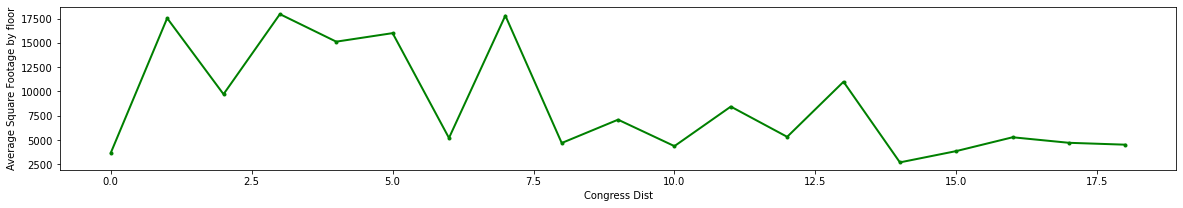

In [25]:
fig, ax = plt.subplots(figsize = (20,3))
ax.plot(agg_bb_average_square_footage.values, '.-g', linewidth = 2)
ax.set_xlabel("Congress Dist")
ax.set_ylabel("Average Square Footage by floor")
plt.show()

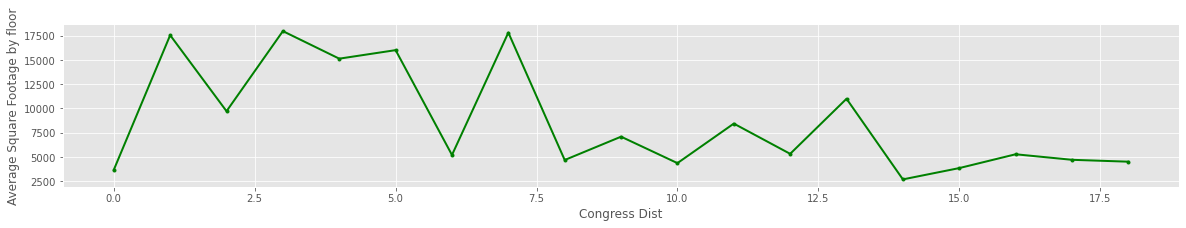

In [26]:
with plt.style.context("ggplot") :
    fig, ax = plt.subplots(figsize = (20,3))
    ax.plot(agg_bb_average_square_footage.values, '.-g', linewidth = 2)
    ax.set_xlabel("Congress Dist")
    ax.set_ylabel("Average Square Footage by floor")
    plt.show()

#### To conclude

In order to know the Average Square Footage by floor, it needed several steps to caclulate it. First, I summed the Square Footage to make the Total Square Footage by Congress Dist. And then, I summed the Total Floors to make the Total Floors by Congress Dist. Lastly, I calculated the Average Square Footage by floor as a function of Congress Dist.